Use Random Forest to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
fraud=pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud.shape

(600, 6)

In [7]:
fraud.size

3600

In [8]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [9]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [10]:
#There is no null value in our dataset

In [11]:
fraud.duplicated().sum()

0

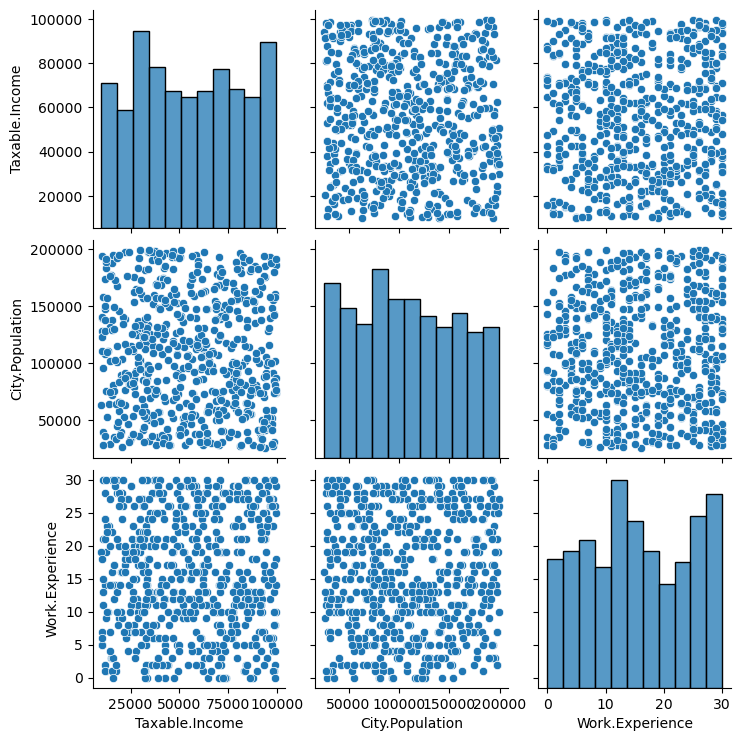

In [12]:
sns.pairplot(fraud)

In [13]:
cor=fraud.corr()
cor

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


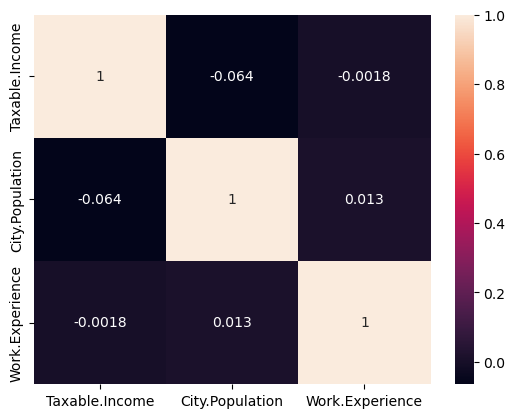

In [14]:
sns.heatmap(cor,annot=True)
plt.show()

In [15]:
#countplot

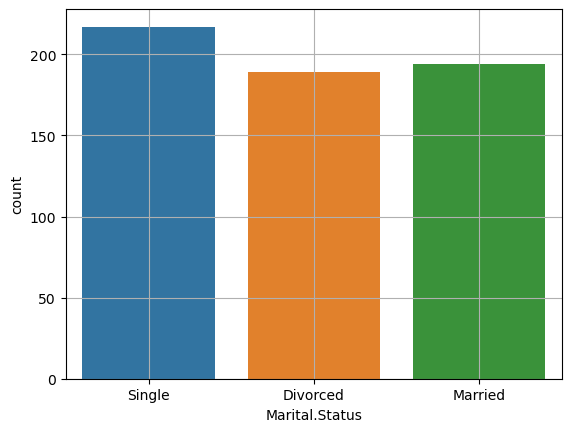

In [16]:
sns.countplot(x='Marital.Status',data=fraud)
plt.grid(True)
plt.show()

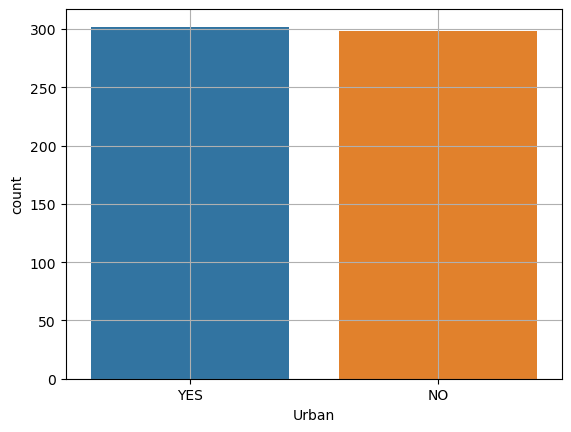

In [17]:
sns.countplot(x='Urban',data=fraud)
plt.grid(True)
plt.show()

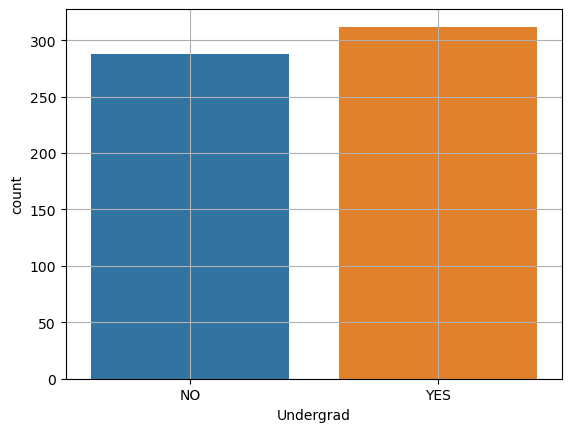

In [18]:
sns.countplot(x='Undergrad',data=fraud)
plt.grid(True)
plt.show()

Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [20]:
print('minimum_value:',fraud['Taxable.Income'].min(),'\n maximun_value:',fraud['Taxable.Income'].max())

minimum_value: 10003 
 maximun_value: 99619


In [21]:
#Converting Target variable into categories Low, Medium and High.
fraud['Taxable.Income']=pd.cut(x=fraud['Taxable.Income'],bins=[10002,30000,99620], labels=['Risky','Good'])
fraud['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [22]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


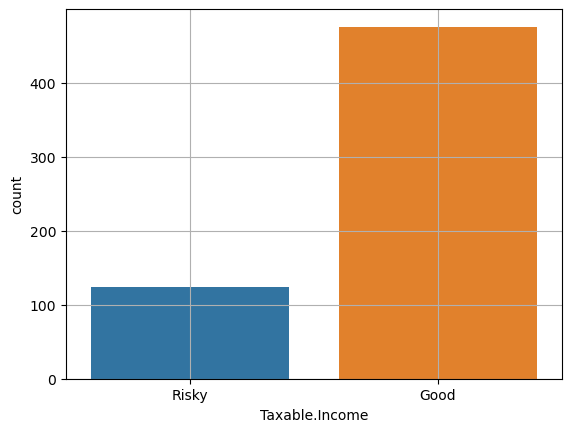

In [23]:
sns.countplot(fraud['Taxable.Income'])
plt.grid(True)
plt.show()

In [24]:
fraud['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [25]:
fraud=pd.get_dummies(fraud,columns=["Taxable.Income"],drop_first=True)

In [26]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1


In [27]:
#pieplot

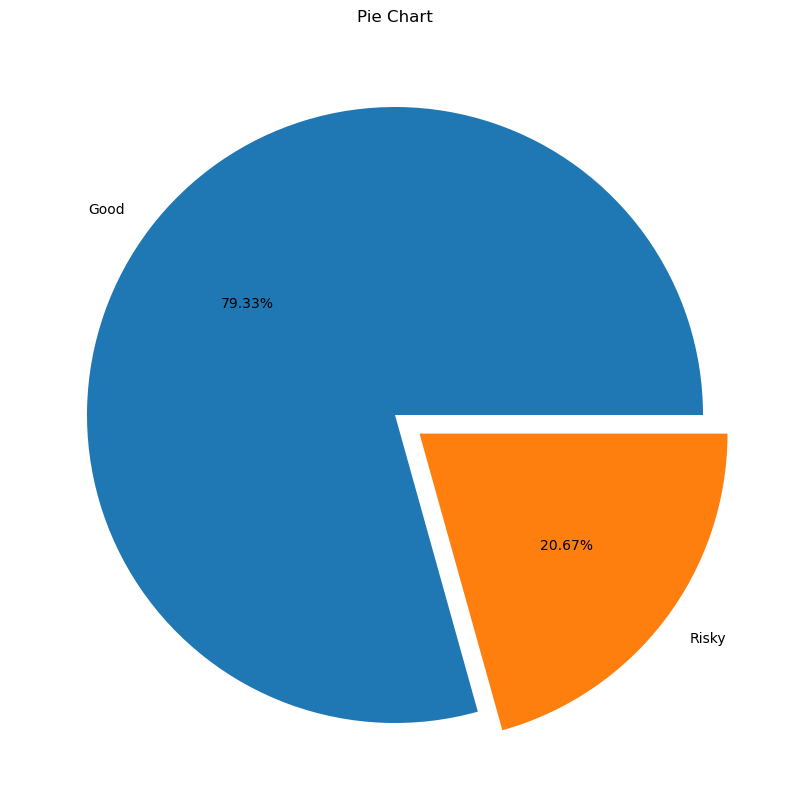

In [28]:
plt.figure(figsize=(15,10))
plt.pie(fraud['Taxable.Income_Good'].value_counts(),labels=['Good','Risky'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart')
plt.show()

In [29]:
#encoding

In [31]:
from sklearn import preprocessing

In [32]:
label_encoder = preprocessing.LabelEncoder()

In [33]:
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud['Taxable.Income_Good']=label_encoder.fit_transform(fraud['Taxable.Income_Good'])
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])

In [34]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


In [35]:
#Data Preparation

In [36]:
X=fraud.drop('Taxable.Income_Good',axis=1)
y=fraud[['Taxable.Income_Good']]

In [37]:
#splitting the data into train and test

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33, random_state = 12,shuffle=True,stratify=y)

In [41]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

In [42]:
#train data

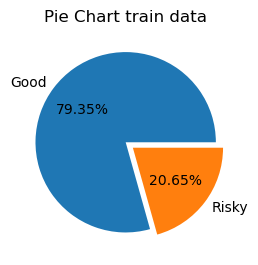

In [47]:
pie1=plt.subplot(121)
line1=plt.pie(y_train.value_counts(),labels=['Good','Risky'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart train data')
plt.show()

In [48]:
#Test data

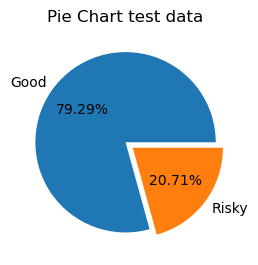

In [49]:
pie2=plt.subplot(122)
line2=plt.pie(y_test.value_counts(),labels=['Good','Risky'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart test data')
plt.show()

In [52]:
print('X_train_shape:',X_train.shape,'\ny_train_shape:',y_train.shape)

X_train_shape: (402, 5) 
y_train_shape: (402, 1)


In [53]:
print('X_test_shape:',X_test.shape,'\ny_test_shape:',y_test.shape)

X_test_shape: (198, 5) 
y_test_shape: (198, 1)


Model Building

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
RF_classifier=RandomForestClassifier(random_state=38)
RF_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=38)

Grid SearchCv

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_search=GridSearchCV(estimator=RF_classifier,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 2}
0.7933333333333332


In [58]:
#new Model

In [59]:
RF_classifier_1=RandomForestClassifier(criterion='entropy',random_state=38,max_depth=2)
RF_classifier_1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, random_state=38)

In [60]:
pred_train=RF_classifier_1.predict(X_train)

In [61]:
pred_test=RF_classifier_1.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
#Train data

In [64]:
accuracy_score(y_train,pred_train)

0.7935323383084577

In [65]:
confusion_matrix(y_train,pred_train)

array([[  0,  83],
       [  0, 319]], dtype=int64)

In [67]:
print('Classification Report:\n',classification_report(y_train,pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.79      1.00      0.88       319

    accuracy                           0.79       402
   macro avg       0.40      0.50      0.44       402
weighted avg       0.63      0.79      0.70       402



In [68]:
#Test data

In [69]:
accuracy_score(y_test,pred_test)

0.7929292929292929

In [70]:
confusion_matrix(y_test,pred_test)

array([[  0,  41],
       [  0, 157]], dtype=int64)

In [71]:
print('Classification Report:\n',classification_report(y_test,pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.79      1.00      0.88       157

    accuracy                           0.79       198
   macro avg       0.40      0.50      0.44       198
weighted avg       0.63      0.79      0.70       198

